# Exploratory Data Analysis on Top 100 Ranked ATP Singles Players
### By: Yuki Kuwahara


**Introduction**

In this project, I will be conducting an Exploratory Data Analysis on the Top 100 Ranked ATP (Association of Tennis Professionals) Players, from the rankings from December 2022. While some rankings of players have changed (as of January 2023), almost all have been in similar rankings. 

My goal in this project is to find interesting patterns and what makes a Professional Male Tennis Player a Top 100 Player and analyze them by using Python and their useful data analysis and visualization libraries.

The source for this dataset is found from Kaggle: https://www.kaggle.com/datasets/isaienkov/atp-ranking

The dataset has the following columns:
- Rank (integer): The Rank of each player.
- Player Name (string): The name of each Player, formatted in Last, First.
- Country (string): The country the player is representing, represented in 3 uppercase acronyms.
- Total Points (integer): Total Points of each player
- Grand Slam Points (integer): Total Points obtained from the 4 Grand Slam tournaments, each worth 2000 points.
- Masters Points (integer): Total Points obtained from the 9 Master tournaments, each worth 1000 points.
- Other Points (integer): Total Points from tournaments that are not Grand Slam or Masters, these include ATP 500s, 250s, Challengers, etc.
- Tournaments (integer): How many tournaments played.

Additionally to this dataset, I have added 4 additional columns that I believe would make this Exploratory Data Analysis more interesting. These are:

- Racquet Brand (string): The racquet brand they are using.
- Head Size of the Racquet (integer): The head size of the racquet they are "using".
- Height (integer): Height in centimeters.
- Age (integer): Age of each player.

These informations can be found from the official site of the ATP Tour https://www.atptour.com/en/rankings/singles , 
or forums and websites such as TennisNerd https://tennisnerd.net/ and https://tt.tennis-warehouse.com/index.php .

Interesting Fact: Professional Players use racquets called "Pro Stocks", where the racquet is not the same as the ones sold in retail. They may be racquets from previous years or generations, or custom made for them only, but in the paint job of the retail racquets. This is why when racquet manufacturers advertise their racquets, they use the term "endorse", not "use".


In [15]:
#Importing the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=0.9)

## Part 0: Importing the Data and Data Cleaning

In this part, we will import our data and perform some data cleaning, if necessary.

In [16]:
#Opening the csv file
df = pd.read_csv("~/Desktop/Datasets/atp_rankings.csv")

#Since we are only going to use the Top 100 Players, we will make a new dataframe consisting of those players.
df = df.loc[0:99, :]

In [17]:
df.head()

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age
0,1,"Alcaraz, Carlos",ESP,6820,2450,2740,1630,17,Babolat,98.0,183.0,19.0
1,2,"Nadal, Rafael",ESP,6020,4180,890,950,14,Babolat,100.0,185.0,36.0
2,3,"Ruud, Casper",NOR,5820,2400,1565,1855,23,Yonex,100.0,183.0,24.0
3,4,"Tsitsipas, Stefanos",GRE,5550,910,3065,1575,23,Wilson,98.0,193.0,24.0
4,5,"Djokovic, Novak",SRB,4820,360,1970,2490,14,Head,95.0,188.0,35.0


Just to see what our data looks like, the above is the first 5 rows of our dataset. However, there is an issue. The head_size, height, and age columns are in float values, not integer values as we wanted. Before converting those values however, we will check if any of the columns have a NaN values, which we do not want in our dataset.

In [18]:
#Checking if any columns have NaN or not
for column in list(df.columns):
    if df[column].isnull().values.any():
        print("True");
    else:
        print("False");

False
False
False
False
False
False
False
False
False
False
False
False


We did not see NaN values, so we will convert the 3 columns with float values to integer values.

In [20]:
#Converting the 3 columns from float to integer values
columns = {"head_size", "height", "age"}
for column in columns:
    df[column] = df[column].astype(int)

In [21]:
df.head()

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age
0,1,"Alcaraz, Carlos",ESP,6820,2450,2740,1630,17,Babolat,98,183,19
1,2,"Nadal, Rafael",ESP,6020,4180,890,950,14,Babolat,100,185,36
2,3,"Ruud, Casper",NOR,5820,2400,1565,1855,23,Yonex,100,183,24
3,4,"Tsitsipas, Stefanos",GRE,5550,910,3065,1575,23,Wilson,98,193,24
4,5,"Djokovic, Novak",SRB,4820,360,1970,2490,14,Head,95,188,35


As we can see, we were able to remove the ".0" values from all the columns. Now, we are ready to make some data analysis.

## Part 1: Analysis by Country

In this part, we will conduct an analysis by seeing which countries and continents have the most Top 100 Players.

We will first start off with the countries, which is what I am very curious about. I want to find how many different countries are represented in the Top 100 players.

In [22]:
df_by_country = df.groupby("country").count()["rank"].reset_index()
df_by_country = df_by_country.rename(columns={"rank":"count"})
display(len(df_by_country))

35

It is very surprising that there are 35 different countries represented in Top 100 players. This means that the player demographics is pretty diverse! Now, I want to find out the Top 5 most common countries in the Top 100 Players.

In [23]:
df_by_country.sort_values("count", ascending=False)[0:5]

,country,count
34,USA,13
12,ESP,10
14,FRA,10
0,ARG,7
29,SRB,5


It seems that USA has the most players in the Top 100 rankings with 13 players, followed by Spain and France with 10 each, Argentina with 7, and Serbia with 5. I am a little surprised that it was USA that had the most players in the Top 100, as I had an image that it would be Spain. It is nice to see that USA Tennis is becoming stronger in recent years, as it seemed to be only Andy Roddick and Andre Agassi in the early 2000s, and then John Isner in the 2010s holding the torch for USA Tennis. However, Spain and France are not too far as well.

Now, let's see the distribution of players by the continents. We will first group the countries represented in the Top 100 to their respective continent. 

Note: This will be done manually as ATP Website does not use the ISO 3166-1 alpha-3 convention for their 3 letter country codes.

In [24]:
#I am an avid ATP watcher, so I know which countries are in which continents! (I did check, so no worries)
north_america = ["USA", "CAN"]
south_america = ["ARG", "CHI", "BRA", "COL"]
australia = ["AUS"]
europe = ["ESP", "FRA", "SRB", "RUS", "ITA", "GBR", "GER", "POR", "CZE", "NED", "CRO", "POL", "BUL", "HUN", "GRE", "BLR", "SWE", "SUI", "BEL", "SVK", "DEN", "FIN", "KAZ", "NOR", "GEO"]
asia = ["JPN", "TPE", "KOR"]

#Checking if the number of countries is correct. Should be 35.
total = 0
for continent in [north_america, south_america, australia, europe, asia]:
    total += len(continent)

total

35

In [25]:
#Here, we are making a new column in the dataframe called continent and setting each player's respective continent.
continent_list = []
for country in df["country"]:
    if country in north_america:
        continent_list.append("NA")
    elif country in south_america:
        continent_list.append("SA")
    elif country in australia:
        continent_list.append("AUS")
    elif country in europe:
        continent_list.append("EUR")
    elif country in asia:
        continent_list.append("ASIA")
        
df["continent"] = continent_list

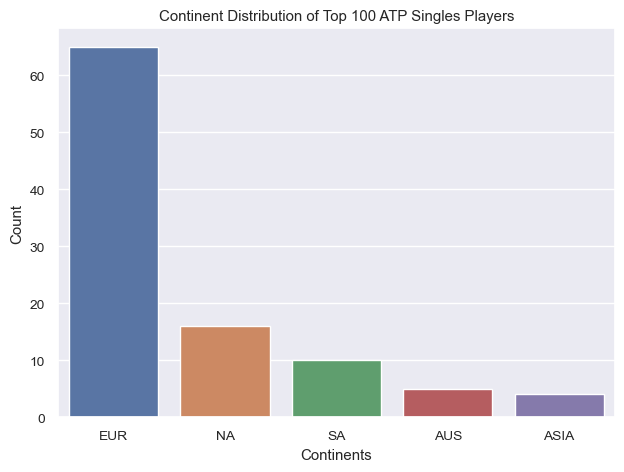

In [26]:
df_by_continent = df.groupby("continent").count()["rank"].reset_index()
df_by_continent = df_by_continent.rename(columns={"rank":"count"}).sort_values("count", ascending=False)

#Visualizing using a bar graph.
sns.barplot(data=df_by_continent, x="continent", y="count")
plt.title("Continent Distribution of Top 100 ATP Singles Players")
plt.xlabel("Continents")
plt.ylabel("Count");

From the bar graph above, we can see that the most common players are Europeans, with about 65 players in the Top 100. Not only is that over 3/5 of the players in the Top 100, but about 4 times more than the next common players, which are from North America, which had about 16 players. We can see that South America, Australia, then Asia trails, in that order. 

This is likely due to the fact that the tennis population in Europe is the largest in the world, and likely due to the fact that there are many more countries in Europe compared to other countries, which means that there are more professional players that are likely to be from Europe. Tennis population in the rest of the continents are not high as Europe however, they are rapidly increasing (like in North America, or USA specifically), which we can hopefully expect greater number of those players in the Top 100 in the near future. 

## Part 2: Points

In this part, we will conduct an analysis of the point distributions of the players from their total points.

In order to conduct this analysis, we will use a ratio that I have made called "High-Point Ratio". This ratio is calculated by dividing the points earned from Grand Slam Tournaments, which the winner can earn up to 2000 points, and Masters 1000 Tournaments, where the winner can earn 1000 points, and divided by their total points they have. 

For some refresher, 
Other Points consists of points earned from ATP 500 (Winner Gets 500 Points), ATP 250 (Winner gets 250 points), Challengers (Winners get 50-125 points depending on tournament), and ITF Futures Tournaments (Winner gets 15 or 25 points depending on tournament).

This is the formula:

$\Large\frac{(\text{Grand Slam Points + Masters 1000 Points})}{(\text{Grand Slam Points + Masters 1000 Points + Other Points})}$

I will also be grouping the players into groups of 10 to make the analysis a little easier to do.

Note: "Other Points" include the Nitto ATP Finals Points, but we will ignore that fact to make the analysis a little easier.

In [27]:
#Calculating the "High-Point Ratio"
def high_point_ratio(dataframe):
    high_points = dataframe["grand_slam_points"] + dataframe["masters_points"]
    total_points = high_points + dataframe["other_points"]
    dataframe["hp_ratio"] = high_points / total_points
    return dataframe

df = high_point_ratio(df)

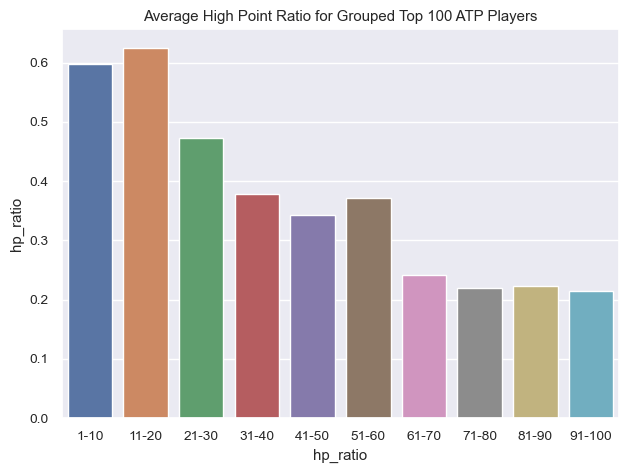

In [28]:
#Grouping each 10 players and averaging the "High-Point Ratio"
average_hp_ratio_grouped = []
for i in range(10,110,10):
    averages = np.mean(df[i-10:i]["hp_ratio"])
    average_hp_ratio_grouped.append(averages)

#Made a dataframe after grouping the players and averaginng their ratios
hp_ratio_df = pd.DataFrame({"rank": ["1-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"], "hp_ratio": average_hp_ratio_grouped})
sns.barplot(data=hp_ratio_df, x="rank", y="hp_ratio")
plt.title("Average High Point Ratio for Grouped Top 100 ATP Players")
plt.xlabel("Ranks in Groups of 10")
plt.xlabel("hp_ratio");

From the bar graph above, we see a pattern that the "High-Point Ratio" is higher for players that are in the higher ranks, specifically in the Top 1-20 players, with the ratio around 0.6. We do see that Players ranked 11-20 have a slightly higher ratio than players ranked 1-10, but this could be due to some fact that Novak Djokovic was not able to compete in the Australian Open, US Open, and other North American Masters tournaments which required a vaccination mandate, which made the points in the Grand Slam and Masters 1000 Tournament Points in total lower than the the other tournaments, which may have slightly lowered the average. But overall, we can see that there is a trend as players ranking fall, their "High-Point Ratio" has decreases, which means that if players want to raise their rankings, the best way to do that is to win and get deeper into the Grand Slam and Masters 1000 Tournaments, which grants them more points. This is especially valuable data for players from rankings gtom 61-100, where their Grand Slam and Masters 1000 Tournament Points only consists of around 25% or less of their total points they have.

## Part 3: Tournaments

In this part, we will conduct an analysis of how many tournaments the players in the Top 100 ATP rankings have played in, and hopefully see some interesting patterns. Just as previous part, we will be grouping the players into groups of 10 to make the analysis easier.

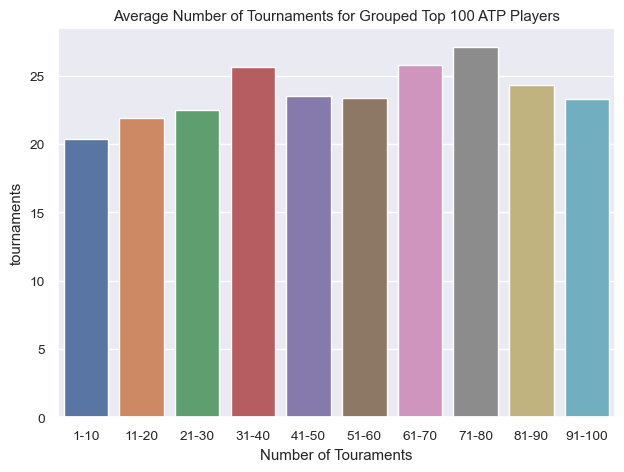

In [29]:
#Grouping each 10 players and averaging the number of tournaments they have played in.
average_tournaments_grouped = []
for i in range(10,110,10):
    averages = np.mean(df[i-10:i]["tournaments"])
    average_tournaments_grouped.append(averages)

#Made a dataframe after grouping the players and averaginng their ratios
tournaments_df = pd.DataFrame({"rank": ["1-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"], "tournaments": average_tournaments_grouped})
sns.barplot(data=tournaments_df, x="rank", y="tournaments")
plt.title("Average Number of Tournaments for Grouped Top 100 ATP Players")
plt.xlabel("Ranks in Groups of 10")
plt.xlabel("Number of Touraments");

From the bar graph above, we do not see a very significant difference of number of tournaments played for each groups of rankings. We do see that Players ranked 1-10 have the lowest number of tournaments played (of 20) however, it is not much far off from others. We do see though that players in between ranks 31-80 play more tournaments in average, likely in the hopes to make deeper runs in more tournaments in order to earn points and stabilize their rankings. From my knowledge however, I am aware that players start to compete in less tournaments as they get older as "load management" (maybe you have heard this term in the NBA as well).

## Part 4: Age

In this part, we will be conducting an analysis of the distributions of the age in the Top 100 ATP Players.

First, we will look at the average age of the Top 100 Players, then we will look more into the distributions of ages.

In [30]:
df_age = df["age"]

#Average Age
np.mean(df_age)

26.9

I am surprised that the average age for the Top 100 ATP Players is 26.9 (nearly 27!). I was expecting the ages to be a little higher as the sport of tennis changed over the last 30 years as well as the medical and technological advances which leads to the longevity of the careers of these players. Therefore, the average age would be a little higher. This is also probably because since I was following the ATP Tour for a long time and know many of the players how has been in the Top 100 for many many years, which may have lead me to think of that way. However, I am aware that younger players (called "Next-Gen") like Carlos Alcaraz and Felix Auger-Aliassime are making huge strides on the tour as well.

I am also curious about the average age in the Top 10. The calculation will be done below.

In [31]:
#Top 10 average age
np.mean(df["age"][:10])

26.3

I am quite surprised about the lower average again, as we know some of the Top Players such as Novak Djokovic (35) and Rafael Nadal (36) are still in the Top 10. However, with Roger Federer, Andy Murray, and Stan Wawrinka not being in the Top 10 or retired has given the next generation of young talented players to climb into the Top 10, which has driven the avearge age in the Top 10 down.

Let's also see who is the youngest and the oldest player in the Top 100, and their ages.

In [32]:
df[df["age"] == min(df_age)]

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age,continent,hp_ratio
0,1,"Alcaraz, Carlos",ESP,6820,2450,2740,1630,17,Babolat,98,183,19,EUR,0.760997
10,11,"Rune, Holger",DEN,2888,460,1166,1262,27,Babolat,98,188,19,EUR,0.563019


It is crazy to see that 19 year olds in the Top 100, and adding onto it, both in the Top 10, and one of them being Number 1 in the world! When I was 19, I was (and still am) in college. It's crazy to see the different routes people take in their lives.

Let's see who the oldest player in the Top 100 is.

In [33]:
df[df["age"] == max(df_age)]

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age,continent,hp_ratio
40,41,"Isner, John",USA,1005,145,415,445,19,Prince,100,208,37,NA,0.557214


It's John Isner that is the oldest in the Top 100, being age 37. Being able to play tennis at such a high level at 37 is crazy, especially for a person his size. This may be due to the fact he can hit many aces, which allows him to keep his service games comfortably and be aggressive on the return games.

Now, we will look at the distribution of the ages in the Top 100.

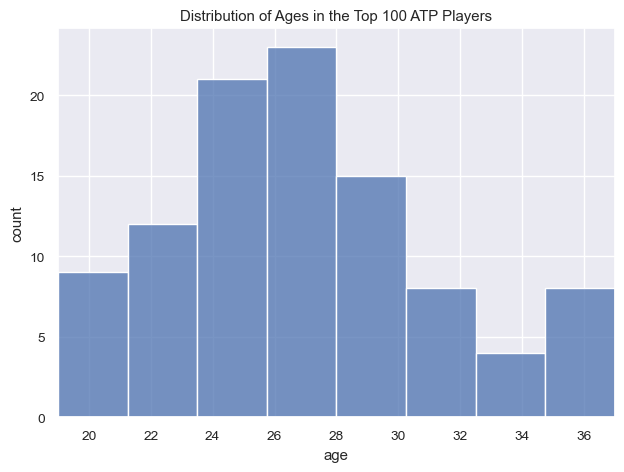

In [34]:
sns.histplot(data=df, x="age").set_xlim(19,37)
plt.title("Distribution of Ages in the Top 100 ATP Players")
plt.xlabel("age")
plt.ylabel("count");

From the histogram above, we can see that most players in the Top 100 are between ages 26-28 with around 23 players, and 24-26 coming in close second with around 21 players, and 28-30 coming in third with around 15 players. This seems to be pretty reasonable, as it is said that athletes tend to be in their best form, or in sports term in their "prime", around the age of 27 (though I did expect a little more older players as said before). Thus, the most common age and the trailing seems to make perfect sense. What I found surprising was there are more players between 35 and 37 compared to 32 and 34. I would believe that the the distribution would have a very uniform distribution (which it is very close to), where there would not be too many young players, then slowly increase around age of 27, then slowly decrease without any increase as they get into their late 30s. It is cool and interesting to see that older players, especially in this case 35-37 year olds still striving and playing at a high level in the ATP Tour.

## Part 5: Height

In this part, we will conduct an analysis of the heights of the Top 100 ATP Players. This is definitely one of the parts of this data analysis that I am curious about, as many people say "height is important" in sports, and the same applies to tennis. We will conduct something similar as the previous part; find the average, shortest and tallest height, and distribution of the heights.

In [35]:
df_height = df["height"]

#Average Height
np.mean(df_height)

187.12

It is surprising to see that the average height for the Top 100 ATP Players is 187.12 centimeters, or about 6 foot 2 inches! This shows that being tall is an important factor if wanting to be in the Top 100. The taller height in tennis gives advantage in serves, as well as the reach for different shots.

Let's take a look at the shortest players in the Top 100.

In [36]:
df[df["height"] == min(df_height)]

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age,continent,hp_ratio
24,25,"Schwartzman, Diego",ARG,1700,315,470,915,23,Head,98,170,30,SA,0.461765
35,36,"Nishioka, Yoshihito",JPN,1134,30,151,953,23,Yonex,98,170,27,ASIA,0.159612
42,43,"Baez, Sebastian",ARG,987,100,155,732,28,Yonex,98,170,22,SA,0.258359


The shortest players in the Top 100 are 170 centimeters (5 foot 7 inches), and there are 3 players with that height. Those being Diego Schwartzman, Yoshihito Nishioka, and Sebastian Baez. It is incredible to see that though their height is much less than the average, they are still very successful in the tour, all being in the Top 50. Something interesting to see is that 2 out of the 3 players above are from South America, and both from Argentina as well.

Let's now take a look at the tallest Top 100 ATP Player.

In [37]:
df[df["height"] == max(df_height)]

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age,continent,hp_ratio
37,38,"Opelka, Reilly",USA,1095,100,120,875,22,Wilson,95,211,25,NA,0.200913


The tallest player at 211 centimeters, or 6 foot 11 inches (nearly 7 feet!) is Reily Opelka from USA. I would imagine an athlete with that height would be in the NBA, but he is playing tennis! I believed John Isner was taller however, he is 208 centimeters, or 6 foot 10 inches, an inch less than Reily. I would be believe that with his height, he would be hitting many aces in the match. However, we can see that Reily is only Rank 37 (this due to the injuries he had in the second half of this season, but his career high is still Number 17), which means that height is not everything in tennis, and being very tall does not necessarily mean that he can be the best of the best players in the world. This is likely due to technique, but most importantly correlated with the height, is that the more taller you are (like Reily, or even John Isner), that harder to have quick movement as your are heavier.

Let's now take a look at look at the distribution of the heights in the Top 100 ATP Players.

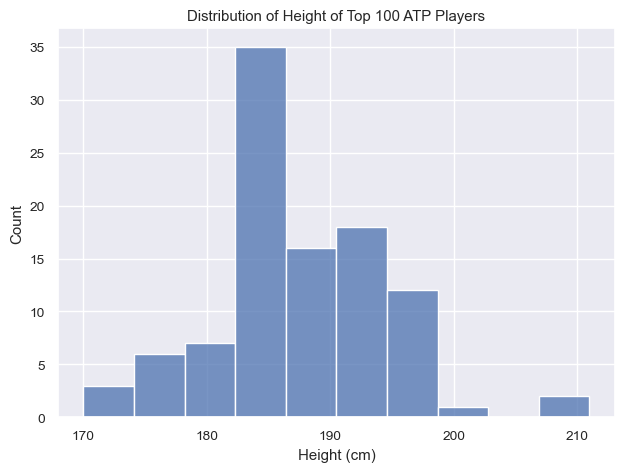

In [38]:
sns.histplot(data=df, x="height")
plt.title("Distribution of Height of Top 100 ATP Players")
plt.xlabel("Height (cm)")
plt.ylabel("Count");

We can see from the histogram above, that the most common height in the Top 100 ATP Tour is between 180 and 190 centimeters, approximately around 185cm (a little over 6 foot 1 inches). The next group of common heights comes around 190 centimeters (about 6 foot 3 inches). We see that there are not many people that are shorter and taller than the aformentioned height. But since the bins look a little hard to see the exact heights, let's take a look at it in the form of bar graph below.

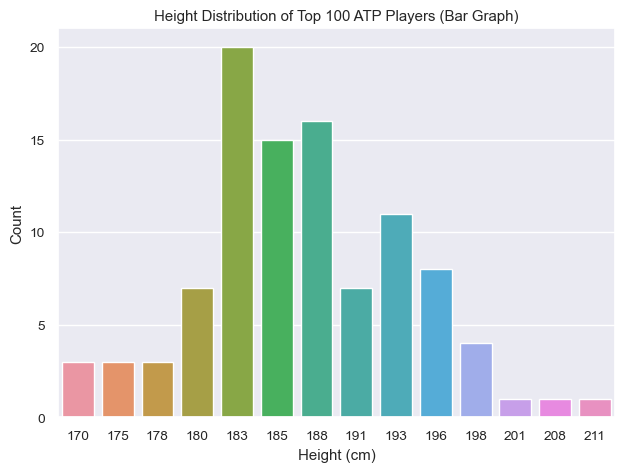

In [39]:
heights = df_height.value_counts().reset_index().rename(columns={"index":"height", "height": "count"})
sns.barplot(data=heights, x="height", y="count").set_yticks([0,5,10,15,20])
plt.title("Height Distribution of Top 100 ATP Players (Bar Graph)")
plt.xlabel("Height (cm)")
plt.ylabel("Count");

This is much better than previous ones, as it is more accurate. We can see that the most common height of the Top 100 ATP Players is 183 centimeters (6 feet ~ 6 foot 1 inches), followed by 188 centimeters (6 foot 2 inches) and 185 centimeters (a little over 6 foot 1 inches). This means that although height is important to the game of tennis, the heights between 183 centimeters and 188 centimeters (6 feet ~ 6 foot 1 inches to 6 foot 2 inches) are the ideal heights. This does not however, mean taller players are in a disadvantage or necessarily "bad", by any means whatsoever. Being tall has its benefits, but being too tall is not always an advantage in other ways we discussed earlier. An interesting finding that I had from this graph however, is that there are more 193 and 196 centimeters (6 foot 4 inches and 6 foot 5 inches respectively) players compared to 191 centimeters (6 foot 3 inches). 

## Part 6: Racquet Brands

In this part, we will be conducting an analysis on what racquet brands are most commonly used in the Top 100 ATP Players. I enjoy discussing about racquets that professional players uses, so this one will be exciting.

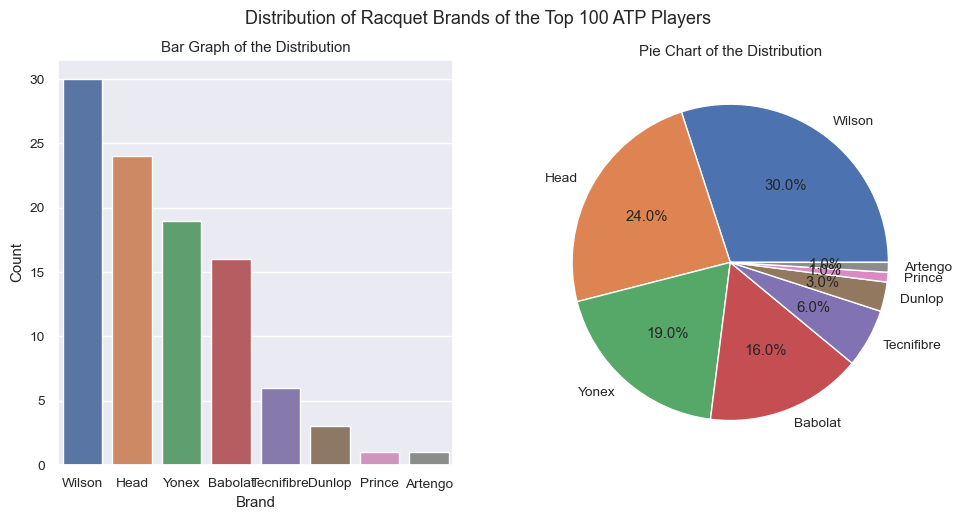

In [40]:
#Making two plots, a bar graph and a pie chart
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Distribution of Racquet Brands of the Top 100 ATP Players")

df_racquets = df["racquet_brand"]
racquets = df_racquets.value_counts().reset_index().rename(columns={"index":"Brand", "racquet_brand": "Count"})

sns.barplot(ax=axes[0], data=racquets, x="Brand", y="Count")
axes[0].set_title("Bar Graph of the Distribution")

racquets_count = df_racquets.value_counts()
brands = racquets_count.index
count = racquets_count.values
plt.pie(count, labels=brands, autopct='%1.1f%%')
axes[1].set_title("Pie Chart of the Distribution");

As we can see from the two plots, the bar graph and the pie chart above, we can see that Wilson has the most players in the Top 100 using their racquets, which being 30 players, which was my prediction. Wilson has been the biggest brand in tennis, and their racquets have a long history especially from the Pete Sampras Era of the 6.1 85 Racquets. The surprise that comes however, is that I believed Babolat would come in second of the number of players in the Top 100 using their racquets as it has been one of the most popular brands and had the highest sales however, it is Head with 24 players, then Yonex in third with 19 players (which is a huge surprise), then Babolat at 4th with 16 players. It is awesome to see that Yonex recently has been making a rise in the tennis racquet market, and being able to sign big names in the Top 100 in the past few years. Other brands such as Technifibre and Dunlop is still considered more of a smaller brand however, with big names such as Daniil Medvedev and Miomir Kecmanovic respectively, they should be able to able to sign with more players and bigger names in the future. On the other hand, Prince and Artengo are more of a niche brand in terms of racquets in the professional world, with John Isner and Gael Monfils only for each brand as their ambassador in the Top 100. However, I am hopeful that more players would start using their brands and increase their signings in the next couple of years, as the players noted aformentionedly are big names and are very influential to the sport of tennis.

## Part  7: Racquet Head Sizes

In this last part, we will be analyzing the racquet head size of the racquets the professionals use. Racquet head size is very important for the players, The numbers usualy range from where between 90-100 square inches in modern standards. The smaller the head size, the more control, the less power, the less forgiving, and the ease to swing the racquet. The bigger the head size, the less control, more power, the more forgiving and less ease to swing the racquet. 

Note that the data obtained in this part is by the "Pro Stock" racquets use, and not the retail racquets they endorse. For example, Novak Djokovic endorses the Head Auxetic Speed Pro, which the retail one is a 100 square inches, but he actually uses a racquet that is 95 square inches.

Let's first take a look at the smallest head size used by the Top 100 ATP Professional Players.

In [41]:
df_headsize = df["head_size"]

df[df["head_size"] == min(df_headsize)]

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age,continent,hp_ratio
16,17,"Cilic, Marin",CRO,2105,1080,425,600,20,Head,93,198,34,EUR,0.714964


It is interesting to see that the smallest head size used by the Top 100 player is 93 sqaure inches, and by Marin Cilic, who in the Top 20. Although he has a very big game with huge serves and forehands, I believe that he wants a racquet with more control and less power as he can generate his own pace and power. Although the head size of 93 sqaure inches came in a little surprise, such a racquet used by a player like Marin is not too surprising when thinking about his game and his playstyle.

Let's now take a look at the biggest head size used by the Top 100 ATP Professional Players.

In [42]:
df[df["head_size"] == max(df_headsize)]

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments,racquet_brand,head_size,height,age,continent,hp_ratio
1,2,"Nadal, Rafael",ESP,6020,4180,890,950,14,Babolat,100,185,36,EUR,0.842193
2,3,"Ruud, Casper",NOR,5820,2400,1565,1855,23,Yonex,100,183,24,EUR,0.681271
7,8,"Rublev, Andrey",RUS,3930,810,840,2280,23,Head,100,188,25,EUR,0.419847
11,12,"Zverev, Alexander",GER,2700,900,1510,290,18,Head,100,198,25,EUR,0.892593
14,15,"Sinner, Jannik",ITA,2410,900,910,600,18,Head,100,188,21,EUR,0.751037
15,16,"Berrettini, Matteo",ITA,2375,1080,110,1185,19,Head,100,196,26,EUR,0.501053
25,26,"Coric, Borna",CRO,1685,90,1085,510,19,Wilson,100,188,26,EUR,0.697329
28,29,"Kecmanovic, Miomir",SRB,1420,315,480,625,23,Dunlop,100,183,23,EUR,0.559859
30,31,"Davidovich Fokina, Alejandro",ESP,1280,235,755,290,25,Head,100,183,23,EUR,0.773438
33,34,"Cressy, Maxime",USA,1163,200,181,782,30,Babolat,100,201,25,NA,0.327601


Well, that's a lot of players than expected. Let's see how many players use a 100 square inched racquets in the Top 100.

In [43]:
len(df[df["head_size"] == max(df_headsize)])

29

29 Players, that means nearly 30% of the Top 100 players uses a 100 square inched racquet! A 100 square inched racquet is much more forgiving to use and gives more power for players when hitting the ball, and since the modern game utilizies more topspin and pace for every shot, it comes no surprise that many players are now using 100 square inched racquets.

Lastly, let's see the distribution of the racquet head sizes used by the Top 100 ATP Players.

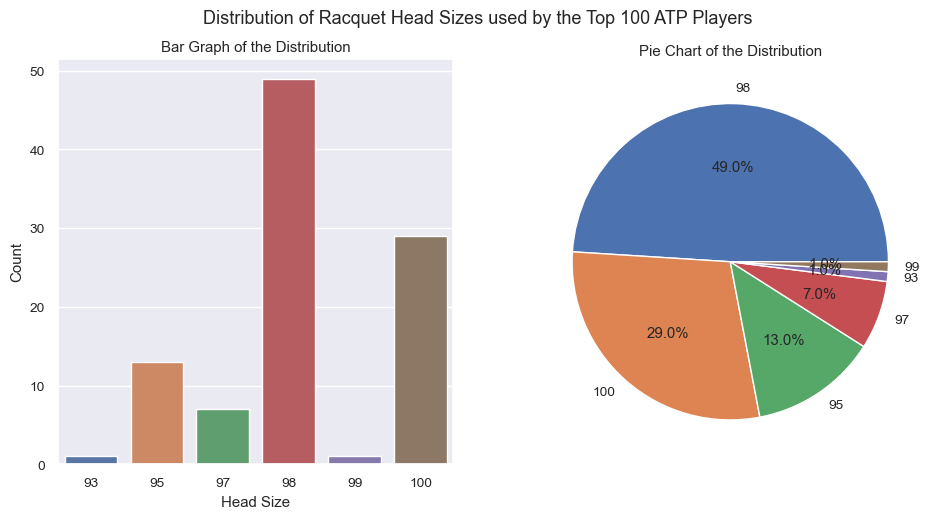

In [44]:
#Making two plots, a bar graph and a pie chart
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Distribution of Racquet Head Sizes used by the Top 100 ATP Players")

racquets = df_headsize.value_counts().reset_index().rename(columns={"index":"Head Size", "head_size": "Count"})

sns.barplot(ax=axes[0], data=racquets, x="Head Size", y="Count")
axes[0].set_title("Bar Graph of the Distribution")

headsize_count = df_headsize.value_counts()
headsize = headsize_count.index
count = headsize_count.values
plt.pie(count, labels=headsize, autopct='%1.1f%%')
axes[1].set_title("Pie Chart of the Distribution");

From the two graphs above, we can see that the most common head size used by the Top 100 ATP Professionals is 98 square inches with 49 players (nearly half!), and 100 square inches with 29 players as mentioned before. There are some professionals who use 95 and 97 square inches, and 93 and 99 sqaure inches being the most uncommon with one player each. The 98 square inched racquets been the most common is something that I was expecting, as 98 square inches is the "modern standard" head size in today's game, as it has a good blend of control as well as power. With 98 and 100 square inched racquet users being nearly 80% of the Top 100, we can see how the racquet head size has evolved during the last 3 decades, as the most common racquets used back in the day for professionals was 85 square inches, which came from the Wilson 6.1 85. The bigger head size is more forgiving and much easier to generate power, which is what the modern gam of tennis needs, as the mentioned before, players hit much harder with power meaning more pace, and more topspin. The smaller head size such as 95 square inches and even the 97 square inches may become much more rare as the game of tennis evolves. Lastly, although 99 sqaure inches seems to be in the "modern standards" however, not many racquet manufacturers create racquets with such a head size, as it is too close to the 98 and the 100 square inched racquets.

## Part 8: Conclusion

From the Exploratory Data Analysis conducted above about the Top 100 ATP Players, I have learned many attributes about those players. Although there are other attributes such as weight, dominant hand, racquet string pattern and such, I believe I have covered the most important and the most interesting ones. Here are the findings I found about each attributes that I have conducted an analysiss about:

Part 1 - Country: USA is the country that has the most players in the Top 100, while Europe is the continent that has the most Top 100 Players.

Part 2 - Points: Players who have a higher "high-point ratio", meaning that they have made deeper runs in Grand Slam and Masters 100 Tournaments tends to be more successful, which leads to higher ranking within the Top 100.

Part 3 - Tournaments: There is not much difference between how many tournaments players depending on their rankings however, players with lower rankings play slightly more tournaments in order to obtain points and boost their rankings.

Part 4 - Age: The most common age in the Top 100 ATP Players are between 24 and 28. The youngest player is 19 years old, and the oldest being 37.

Part 5 - Height: The most common height in the ATP Tour is 183 centimeters (6 feet ~ 6 foot 1 inches). The most optimal height to be successful in tennis (based on the data, at least), is between 183 and 188 centimeters. Being taller is also advantageous, but being too tall is not necessarily a good thing as well. The shortest player stands at 170 centimeters (5 foot 7 inches), while the tallest player stands at 211 centimeters (6 foot 11 inches).

Part 6 - Racquet Brands: The most common racquet brand used by the Top 100 Players are Wilson, then Head, then Yonex, then Babolat, and other brands such as Tecnifibre and Dunlop. Was generally surprised about the smaller number of players in the Top 100 that used Babolat Racquets. 

Part 7 - Racquet Head Sizes: The most common head size used by the Top 100 Players is 98 square inches, followed by 100 square inches. The smallest racquet head size used in the Top 100 is 93 square inches, and the largest being 100 square inches.